In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing dataframe

In [2]:
df = pd.read_csv("synthetic_asthma_dataset.csv")
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


## Data Cleaning

In [3]:
df.isnull().sum()

Patient_ID                    0
Age                           0
Gender                        0
BMI                           0
Smoking_Status                0
Family_History                0
Allergies                  2936
Air_Pollution_Level           0
Physical_Activity_Level       0
Occupation_Type               0
Comorbidities              4967
Medication_Adherence          0
Number_of_ER_Visits           0
Peak_Expiratory_Flow          0
FeNO_Level                    0
Has_Asthma                    0
Asthma_Control_Level       7567
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [5]:
df['Patient_ID'].nunique()

10000

In [6]:
df['Comorbidities'].fillna('None', inplace=True)
df['Asthma_Control_Level'].fillna('Unknown', inplace=True)
df['Allergies'].fillna('No Allergies', inplace=True)
df

C:\Users\ADlaw\AppData\Local\Temp\ipykernel_5240\1568348353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Comorbidities'].fillna('None', inplace=True)
C:\Users\ADlaw\AppData\Local\Temp\ipykernel_5240\1568348353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,No Allergies,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,Unknown
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,Unknown
2,ASTH100002,72,Female,17.6,Never,0,No Allergies,Moderate,Moderate,Indoor,None,0.38,0,303.3,15.3,0,Unknown
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,No Allergies,Moderate,Active,Indoor,None,0.82,3,535.0,27.7,0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ASTH109995,70,Male,25.0,Never,0,No Allergies,Low,Sedentary,Indoor,None,0.67,0,580.6,18.7,0,Unknown
9996,ASTH109996,78,Female,24.8,Never,0,Pollen,Low,Moderate,Indoor,Diabetes,0.72,1,417.6,40.8,0,Unknown
9997,ASTH109997,58,Male,30.1,Former,1,Pollen,Low,Moderate,Indoor,None,0.28,0,459.1,20.3,1,Not Controlled
9998,ASTH109998,88,Female,31.2,Former,0,Pollen,Moderate,Moderate,Indoor,None,0.44,0,415.9,25.0,0,Unknown


In [ ]:
# df.to_csv("cleaned_synthetic_asthma_dataset.csv", index=False)

In [8]:
df.describe()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,44.930700,25.053320,0.303400,0.497998,1.015900,400.884090,25.101420,0.243300
std,25.653559,4.874466,0.459749,0.224809,1.020564,97.531113,9.840184,0.429096
min,1.000000,15.000000,0.000000,0.000000,0.000000,150.000000,5.000000,0.000000
25%,23.000000,21.600000,0.000000,0.320000,0.000000,334.800000,18.200000,0.000000
50%,45.000000,25.000000,0.000000,0.500000,1.000000,402.500000,25.000000,0.000000
75%,67.000000,28.400000,1.000000,0.670000,2.000000,468.700000,31.700000,0.000000
max,89.000000,45.000000,1.000000,0.990000,6.000000,600.000000,63.900000,1.000000


In [9]:
df.select_dtypes(include = ['number']).corr()

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
Age,1.000000,-0.010078,0.007481,-0.005332,-0.014775,0.012447,0.012180,-0.004346
BMI,-0.010078,1.000000,-0.001244,-0.001318,0.003024,-0.000559,-0.005137,0.098425
Family_History,0.007481,-0.001244,1.000000,0.019463,0.020411,-0.009463,0.005389,0.409531
Medication_Adherence,-0.005332,-0.001318,0.019463,1.000000,-0.001243,-0.012747,0.019040,0.003785
Number_of_ER_Visits,-0.014775,0.003024,0.020411,-0.001243,1.000000,0.001293,0.009969,0.005781
Peak_Expiratory_Flow,0.012447,-0.000559,-0.009463,-0.012747,0.001293,1.000000,0.000575,-0.005207
FeNO_Level,0.012180,-0.005137,0.005389,0.019040,0.009969,0.000575,1.000000,0.007012
Has_Asthma,-0.004346,0.098425,0.409531,0.003785,0.005781,-0.005207,0.007012,1.000000


## EDA

<Axes: >

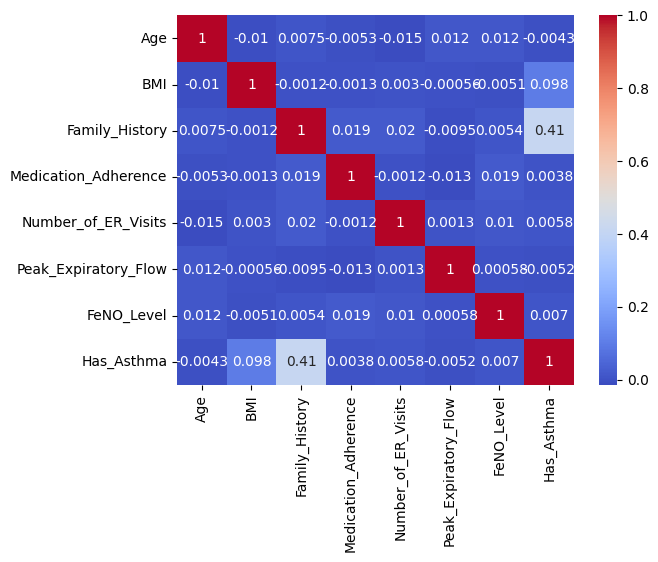

In [10]:
sns.heatmap(df.select_dtypes(include = ['number']).corr(), annot=True, cmap='coolwarm')

In [11]:
df = df.drop(['Patient_ID'], axis=1)

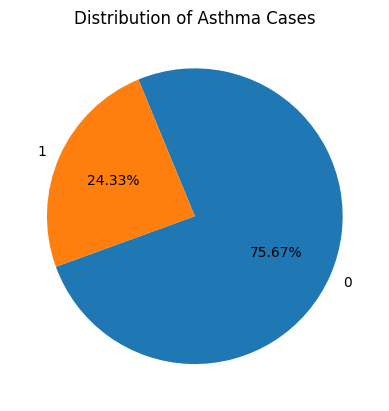

In [12]:
asthma_count = df['Has_Asthma'].value_counts()
plt.pie(asthma_count, labels=asthma_count.index, autopct='%1.2f%%', startangle=200)
plt.title('Distribution of Asthma Cases')
plt.show()

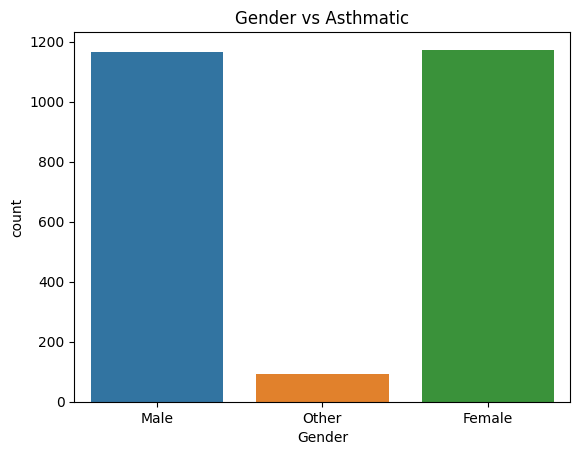

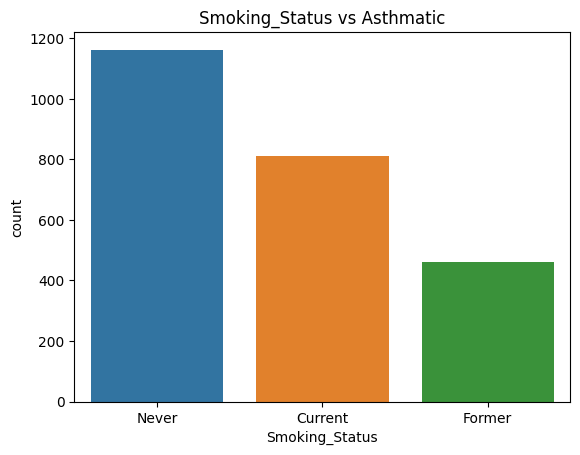

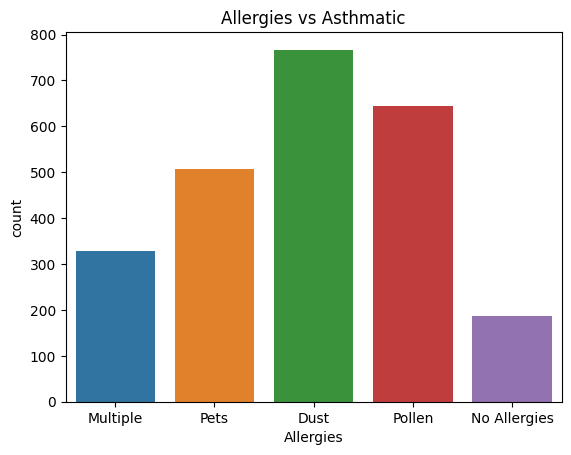

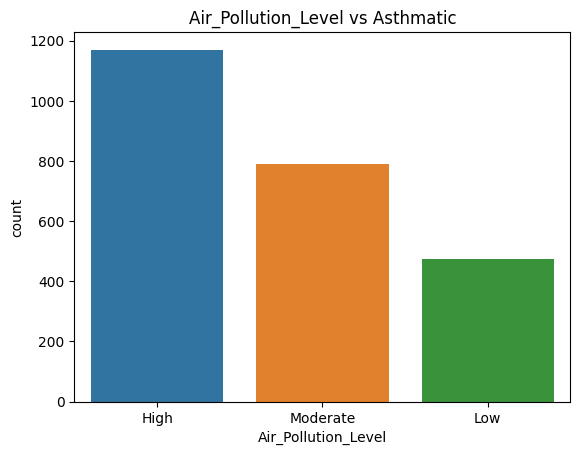

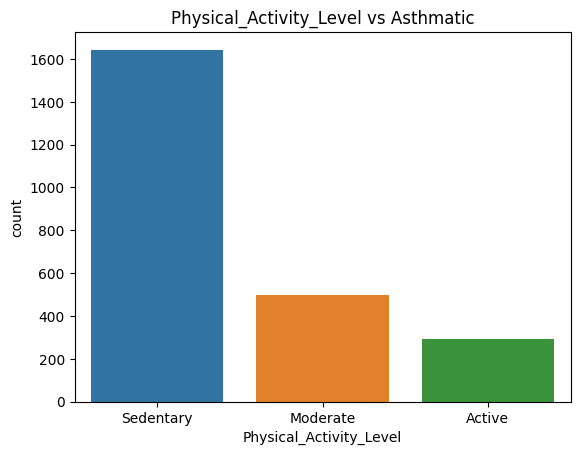

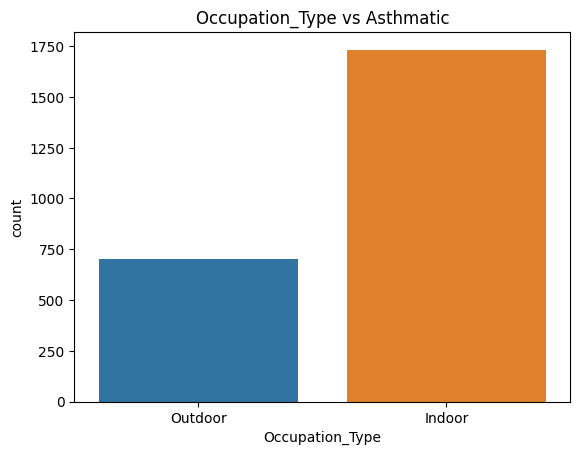

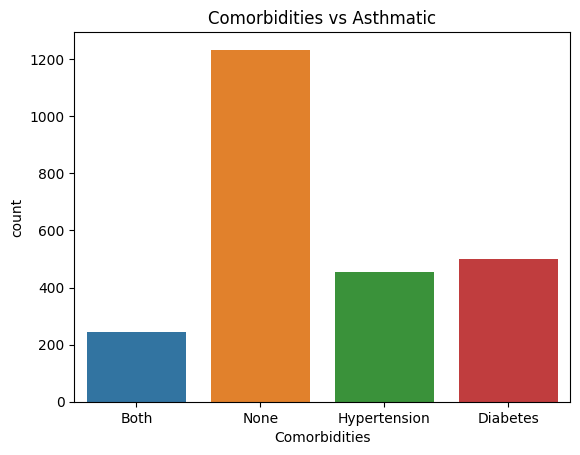

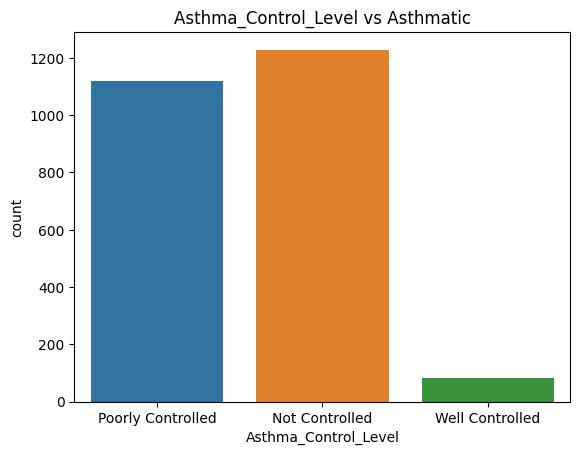

In [13]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df[df['Has_Asthma']==1], x=col, hue= col)
    plt.title(f'{col} vs Asthmatic')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

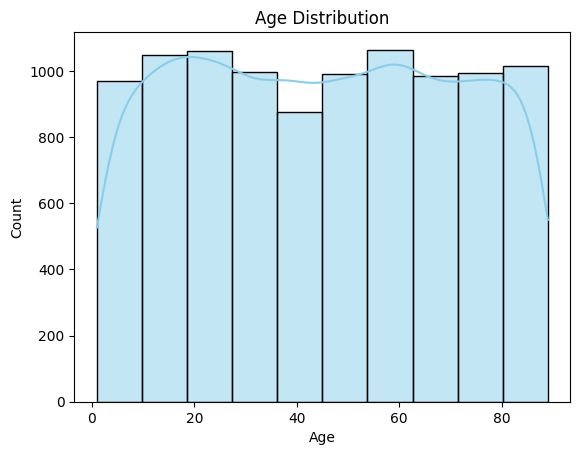

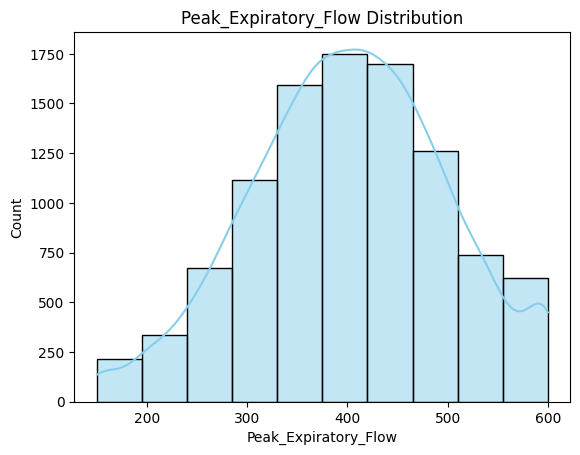

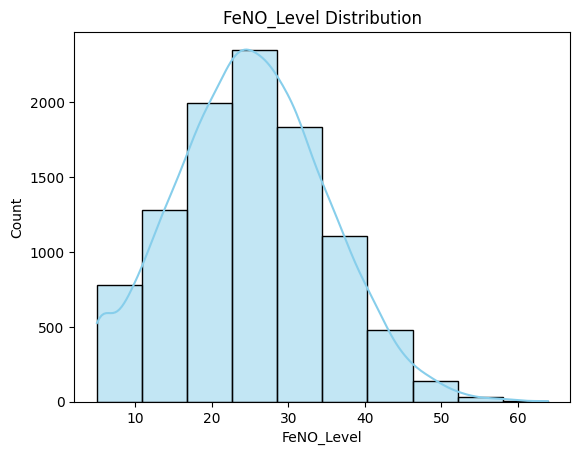

In [14]:
for col in ['Age', 'Peak_Expiratory_Flow', 'FeNO_Level']:
    sns.histplot(df[col], bins=10, kde= True, edgecolor='black', color='skyblue')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

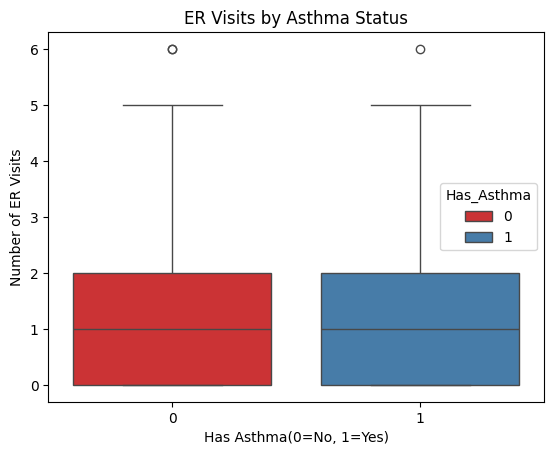

In [15]:
sns.boxplot(x='Has_Asthma', y='Number_of_ER_Visits', hue='Has_Asthma',data=df, palette='Set1')
plt.title('ER Visits by Asthma Status')
plt.xlabel('Has Asthma(0=No, 1=Yes)')
plt.ylabel('Number of ER Visits')
plt.show()

## Prediction Model

In [16]:
df_model = df.drop('Asthma_Control_Level', axis=1)
df_model = pd.get_dummies(df_model, dtype=int, drop_first=True)
df_model

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Gender_Male,Gender_Other,...,Allergies_Pets,Allergies_Pollen,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Occupation_Type_Outdoor,Comorbidities_Diabetes,Comorbidities_Hypertension,Comorbidities_None
0,52,27.6,1,0.38,0,421.0,46.0,0,0,0,...,0,0,0,1,0,1,1,1,0,0
1,15,24.6,0,0.60,2,297.6,22.9,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,72,17.6,0,0.38,0,303.3,15.3,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,61,16.8,0,0.60,1,438.0,40.1,1,1,0,...,0,0,0,0,0,1,1,0,0,0
4,21,30.2,0,0.82,3,535.0,27.7,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,25.0,0,0.67,0,580.6,18.7,0,1,0,...,0,0,1,0,0,1,0,0,0,1
9996,78,24.8,0,0.72,1,417.6,40.8,0,0,0,...,0,1,1,0,1,0,0,1,0,0
9997,58,30.1,1,0.28,0,459.1,20.3,1,1,0,...,0,1,1,0,1,0,0,0,0,1
9998,88,31.2,0,0.44,0,415.9,25.0,0,0,0,...,0,1,0,1,1,0,0,0,0,1


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
x = df_model.drop('Has_Asthma', axis=1)
y = df_model['Has_Asthma']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Using KNN

In [20]:
model_1 = KNeighborsClassifier(n_neighbors=5)
model_1.fit(x_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Confusion Matrix:
[[1381  123]
 [ 458   38]]


Text(0.5, 23.52222222222222, 'Predicted')

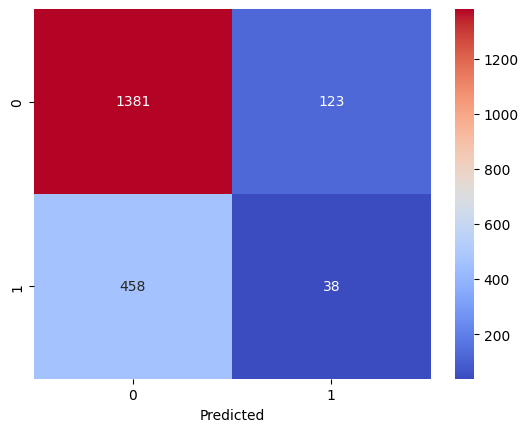

In [21]:
y_pred = model_1.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      1504
           1       0.24      0.08      0.12       496

    accuracy                           0.71      2000
   macro avg       0.49      0.50      0.47      2000
weighted avg       0.62      0.71      0.65      2000



### Using Logistic Regression

In [23]:
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Confusion Matrix:
[[1504    0]
 [  25  471]]


Text(0.5, 23.52222222222222, 'Predicted')

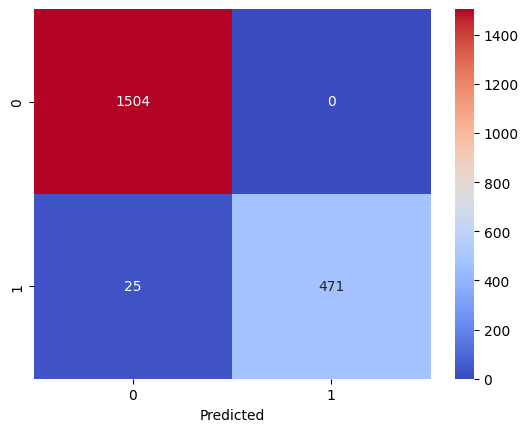

In [24]:
y_pred = model_2.predict(x_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1504
           1       1.00      0.95      0.97       496

    accuracy                           0.99      2000
   macro avg       0.99      0.97      0.98      2000
weighted avg       0.99      0.99      0.99      2000

